In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
# TODO 1: Load the dataset
# Load the California Housing dataset and select relevant columns
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
print("Column names:", df.columns.tolist())

# Select only Latitude, Longitude, MedInc
df = df[['Latitude', 'Longitude', 'MedInc']]
print("Selected columns:", df.columns.tolist())
print(df.head())

Column names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Selected columns: ['Latitude', 'Longitude', 'MedInc']
   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


In [4]:
# TODO 2: Split the dataset into train and test
# Divide the data into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# TODO 3: Train K-Means on training set
# Scale features and apply K-Means clustering
scaler = StandardScaler()
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaler.fit_transform(X_train))

# Predict clusters for training set
train_clusters = kmeans.predict(scaler.transform(X_train))
X_train['cluster'] = train_clusters

# Predict clusters for test set
test_clusters = kmeans.predict(scaler.transform(X_test))
X_test['cluster'] = test_clusters

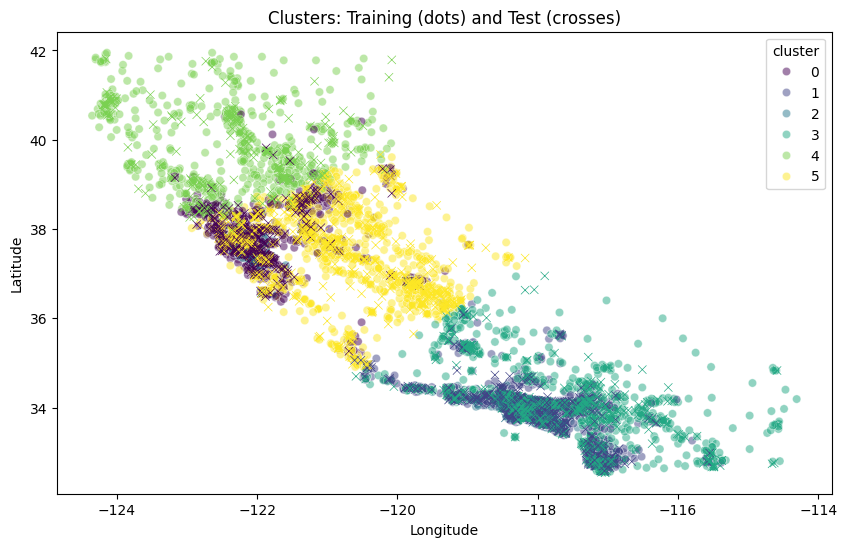

In [6]:
# TODO 4: Plot the clusters
# Visualize clusters with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='Longitude', y='Latitude', hue='cluster', palette='viridis', legend='full', alpha=0.5)
sns.scatterplot(data=X_test, x='Longitude', y='Latitude', hue='cluster', palette='viridis', marker='x', legend=False)
plt.title('Clusters: Training (dots) and Test (crosses)')
plt.savefig('clusters_plot.png')
plt.show()

Accuracy: 0.9949127906976745
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       557
           1       1.00      1.00      1.00       897
           2       1.00      0.97      0.99       116
           3       1.00      1.00      1.00      1397
           4       0.98      0.99      0.99       246
           5       0.99      0.99      0.99       915

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



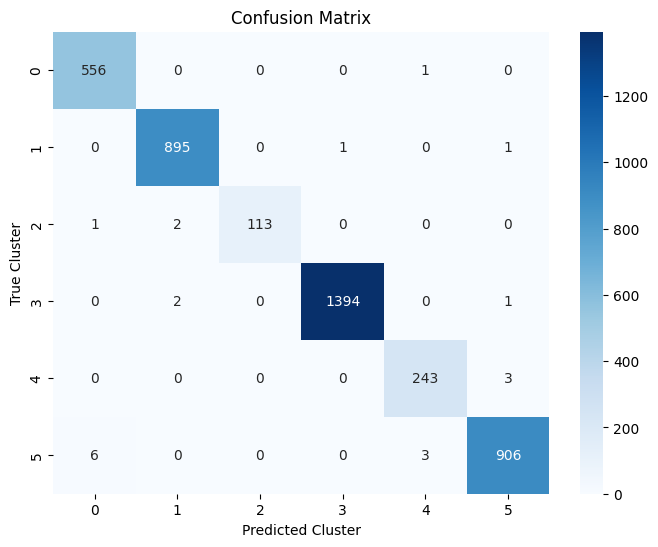

In [7]:
# TODO 5: Train a supervised classification model
# Train a Random Forest classifier to predict clusters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train.drop('cluster', axis=1), X_train['cluster'])

# Predict on test set
y_pred = rf.predict(X_test.drop('cluster', axis=1))

# Evaluate performance
accuracy = accuracy_score(X_test['cluster'], y_pred)
print("Accuracy:", accuracy)
print(classification_report(X_test['cluster'], y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(X_test['cluster'], y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')
plt.savefig('confusion_matrix.png')
plt.show()

In [8]:
# TODO 6: Save the models
# Save K-Means, Random Forest, and scaler models
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Models saved.")

Models saved.
